# importing the data to google colab 

In [1]:
from google.colab import drive 

In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


# importing importtant libraries

In [3]:
import pandas as pd 
import numpy as np #mathematical computations
import matplotlib.pyplot as plt #visualization
import matplotlib
import seaborn as sns #visualization


%matplotlib inline

# exploing and reading my data 

In [101]:
tcdata = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/data_techno/tc20171021.csv", sep='delimiter', header=None)
cardata = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/data_techno/true_car_listings.csv", sep='delimiter', header=None)



/usr/local/lib/python3.7/dist-packages/pandas/util/_decorators.py:311: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  return func(*args, **kwargs)


In [5]:
tcdata.head()

,Id,Price,Year,Mileage,City,State,Vin,Make,Model
0,1,16472,2015,18681,Jefferson City,MO,KL4CJBSBXFB267643,Buick,EncoreConvenience
1,2,15749,2015,27592,Highland,IN,KL4CJASB5FB245057,Buick,EncoreFWD
2,3,16998,2015,13650,Boone,NC,KL4CJCSB0FB264921,Buick,EncoreLeather
3,4,15777,2015,25195,New Orleans,LA,KL4CJASB4FB217542,Buick,EncoreFWD
4,5,16784,2015,22800,Las Vegas,NV,KL4CJBSB3FB166881,Buick,EncoreConvenience


In [6]:
cardata.head()

,Price,Year,Mileage,City,State,Vin,Make,Model
0,8995,2014,35725,El Paso,TX,19VDE2E53EE000083,Acura,ILX6-Speed
1,10888,2013,19606,Long Island City,NY,19VDE1F52DE012636,Acura,ILX5-Speed
2,8995,2013,48851,El Paso,TX,19VDE2E52DE000025,Acura,ILX6-Speed
3,10999,2014,39922,Windsor,CO,19VDE1F71EE003817,Acura,ILX5-Speed
4,14799,2016,22142,Lindon,UT,19UDE2F32GA001284,Acura,ILXAutomatic


# merging data to start working on it 

In [7]:
mergeddata = pd.concat([tcdata,cardata],axis= 0)

# exploring data after merging 


In [8]:
mergeddata.shape

(2068372, 9)

In [11]:

mergeddata.columns

Index(['Id', 'Price', 'Year', 'Mileage', 'City', 'State', 'Vin', 'Make',
       'Model'],
      dtype='object')

droping unimportant columns 

In [12]:
mergeddata=mergeddata.drop(['Id'], axis = 1)
mergeddata

,Price,Year,Mileage,City,State,Vin,Make,Model
0,16472,2015,18681,Jefferson City,MO,KL4CJBSBXFB267643,Buick,EncoreConvenience
1,15749,2015,27592,Highland,IN,KL4CJASB5FB245057,Buick,EncoreFWD
2,16998,2015,13650,Boone,NC,KL4CJCSB0FB264921,Buick,EncoreLeather
3,15777,2015,25195,New Orleans,LA,KL4CJASB4FB217542,Buick,EncoreFWD
4,16784,2015,22800,Las Vegas,NV,KL4CJBSB3FB166881,Buick,EncoreConvenience
...,...,...,...,...,...,...,...,...
852117,63215,2017,9,Culver City,CA,YV1A22MK9H1013237,Volvo,S90T6
852118,72260,2017,3201,Englewood,NJ,YV4A22PL3H1186162,Volvo,XC90T6
852119,55999,2016,28941,Fort Collins,CO,YV4A22PL4G1000868,Volvo,XC90AWD
852120,60240,2017,3005,San Leandro,CA,YV4A22NLXH1006162,Volvo,V90


# describing the numerical values 

In [13]:
mergeddata.describe()

,Price,Year,Mileage
count,2.068372e+06,2.068372e+06,2.068372e+06
mean,2.117289e+04,2.013300e+03,5.274318e+04
std,1.334331e+04,3.430814e+00,6.836142e+04
min,1.500000e+03,1.997000e+03,5.000000e+00
25%,1.299500e+04,2.012000e+03,2.391000e+04
50%,1.800000e+04,2.014000e+03,4.042300e+04
75%,2.681700e+04,2.016000e+03,7.250400e+04
max,4.995000e+05,2.018000e+03,7.758776e+07


# column types 

In [14]:
mergeddata.dtypes

Price       int64
Year        int64
Mileage     int64
City       object
State      object
Vin        object
Make       object
Model      object
dtype: object

In [15]:
mergeddata.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2068372 entries, 0 to 852121
Data columns (total 8 columns):
 #   Column   Dtype 
---  ------   ----- 
 0   Price    int64 
 1   Year     int64 
 2   Mileage  int64 
 3   City     object
 4   State    object
 5   Vin      object
 6   Make     object
 7   Model    object
dtypes: int64(3), object(5)
memory usage: 142.0+ MB


# Checking missing values

In [16]:
mergeddata.isnull().sum()

Price      0
Year       0
Mileage    0
City       0
State      0
Vin        0
Make       0
Model      0
dtype: int64

# checking Duplicates

In [17]:
mergeddata.duplicated().sum()

539156

#Dropping Duplicates

In [41]:
mdata = mergeddata.drop_duplicates()

# Unique values in each variable

In [42]:
mdata.nunique()

Price        53897
Year            22
Mileage     173038
City          2599
State           59
Vin        1227863
Make            58
Model         3163
dtype: int64

In [34]:
mdata.value_counts()

Price   Year  Mileage  City             State  Vin                Make           Model        
1500    1997  116150   Jasper            AL    WDBJF55F7VA386610  Mercedes-Benz  E-ClassE320      1
23490   2014  32484    Indianapolis      IN    4T1BK1EB3EU085222  Toyota         AvalonLimited    1
              36372    Plano             TX    JN1BV7AP1EM691928  INFINITI       Q50RWD           1
              34939    Plano             TX    JN1BV7AP0EM672867  INFINITI       Q50RWD           1
              34648    Frankfort         KY    JN8AZ1MW9EW506627  Nissan         MuranoAWD        1
                                                                                                 ..
14990   2008  151400   Rome              GA    3TMJU62N28M061816  Toyota         Tacoma2WD        1
              148995   Tucson            AZ    1FTWX32R38EA86535  Ford           Super            1
              140835   Cookeville        TN    2GTEK19J481231985  GMC            Sierra           1
     

# Dealing with Numerical Data


In [35]:
num_data = mdata._get_numeric_data()
num_data

,Price,Year,Mileage
0,16472,2015,18681
1,15749,2015,27592
2,16998,2015,13650
3,15777,2015,25195
4,16784,2015,22800
...,...,...,...
852114,53855,2017,7530
852116,54995,2017,2474
852117,63215,2017,9
852120,60240,2017,3005


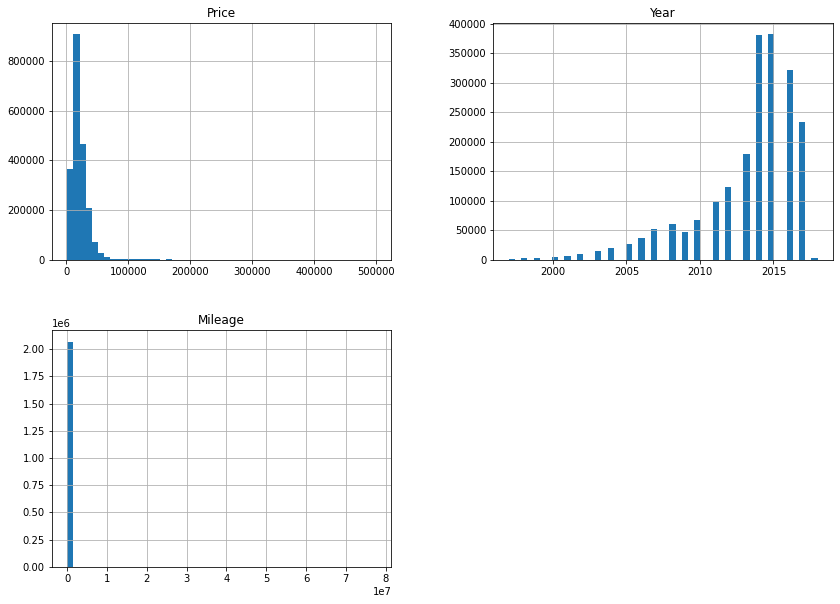

In [28]:
num_data.hist(figsize=(14, 10), bins=50, xlabelsize=10, ylabelsize=10); 

# showing correlation 

In [46]:
datacorr= mdata.corr()
datacorr

,Price,Year,Mileage
Price,1.000000,0.398780,-0.226029
Year,0.398780,1.000000,-0.421406
Mileage,-0.226029,-0.421406,1.000000


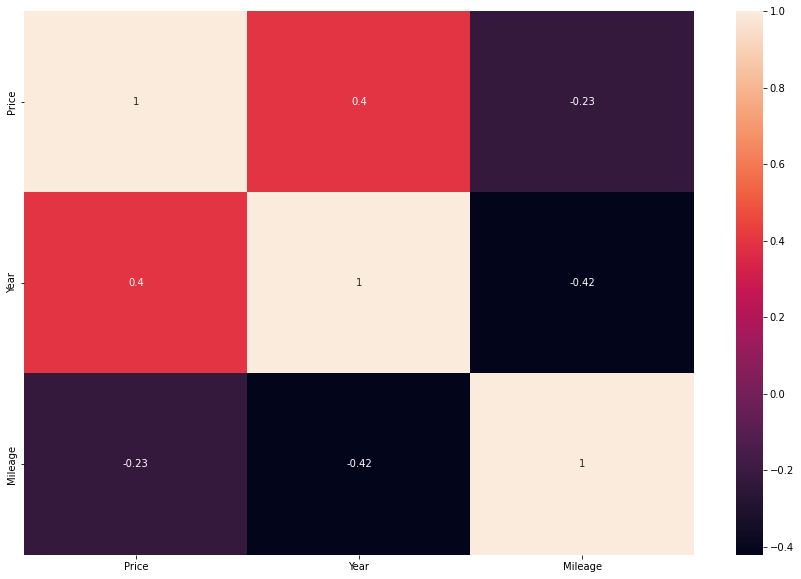

In [48]:
plt.figure(figsize = (15,10))
sns.heatmap(datacorr,annot=True)

# showing the price increasing by year 

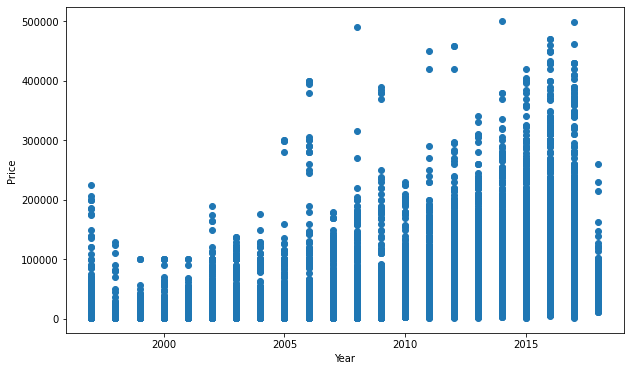

In [47]:
fig, ax = plt.subplots(figsize = (10 , 6))
ax.scatter(mdata["Year"] , mdata["Price"])
ax.set_xlabel('Year')
ax.set_ylabel('Price')
plt.show()

# Finding OutLiers and removing them 

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


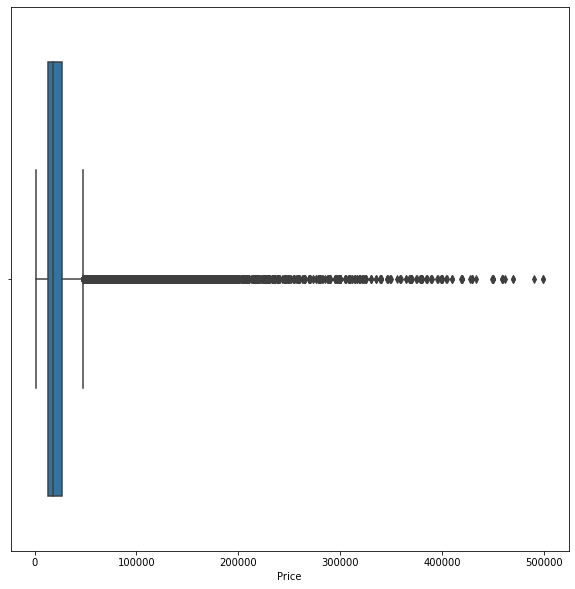

In [49]:
fig, axes = plt.subplots(figsize = (10 , 10))

sns.boxplot(mdata['Price'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


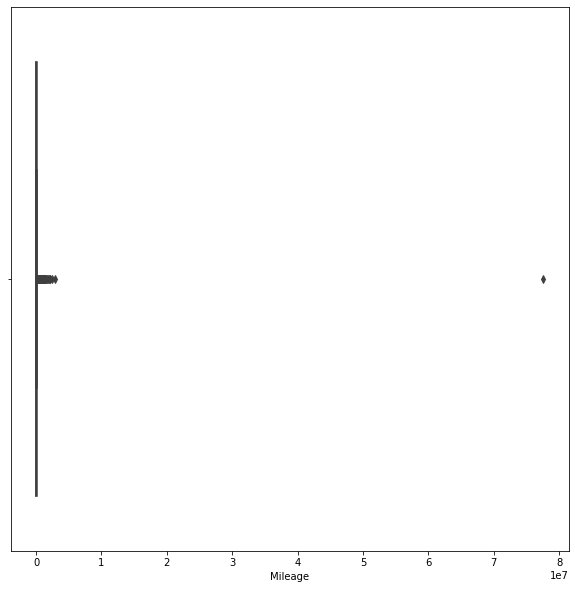

In [50]:
fig, axes = plt.subplots(figsize = (10 , 10))

sns.boxplot(mdata['Mileage'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


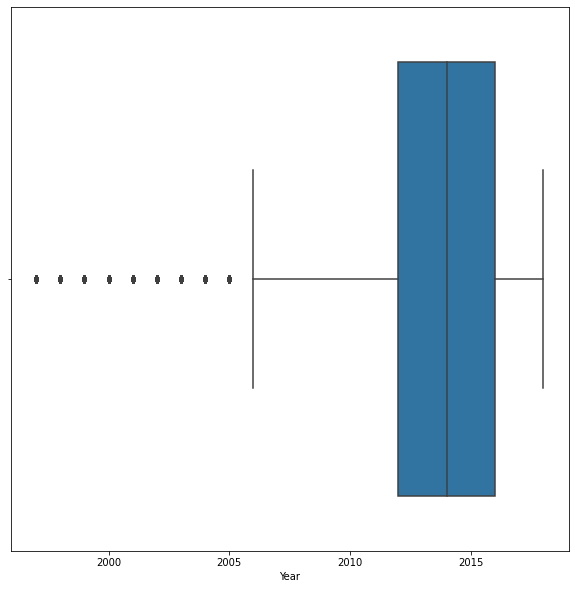

In [52]:
fig, axes = plt.subplots(figsize = (10 , 10))

sns.boxplot(mdata['Year'])

In [53]:
Q1 = mdata.quantile(q = 0.25, axis = 0, numeric_only = True, interpolation = 'linear')

Q3 = mdata.quantile(q = 0.75, axis = 0, numeric_only = True, interpolation = 'linear')

In [54]:
IQR = Q3 - Q1

print(IQR)

Price      13828.0
Year           4.0
Mileage    47367.0
dtype: float64


#categorical data analysis

In [58]:
cat_data = mdata.select_dtypes(include=['object']).copy()


In [60]:
cat_data

,City,State,Vin,Make,Model
0,Jefferson City,MO,KL4CJBSBXFB267643,Buick,EncoreConvenience
1,Highland,IN,KL4CJASB5FB245057,Buick,EncoreFWD
2,Boone,NC,KL4CJCSB0FB264921,Buick,EncoreLeather
3,New Orleans,LA,KL4CJASB4FB217542,Buick,EncoreFWD
4,Las Vegas,NV,KL4CJBSB3FB166881,Buick,EncoreConvenience
...,...,...,...,...,...
852114,Marietta,GA,YV1A22MK3H1004002,Volvo,S90T6
852116,Berwyn,PA,YV1A22MK1H1010445,Volvo,S90T6
852117,Culver City,CA,YV1A22MK9H1013237,Volvo,S90T6
852120,San Leandro,CA,YV4A22NLXH1006162,Volvo,V90


In [61]:
cat_data.info

<bound method DataFrame.info of                   City State                Vin   Make              Model
0       Jefferson City    MO  KL4CJBSBXFB267643  Buick  EncoreConvenience
1             Highland    IN  KL4CJASB5FB245057  Buick          EncoreFWD
2                Boone    NC  KL4CJCSB0FB264921  Buick      EncoreLeather
3          New Orleans    LA  KL4CJASB4FB217542  Buick          EncoreFWD
4            Las Vegas    NV  KL4CJBSB3FB166881  Buick  EncoreConvenience
...                ...   ...                ...    ...                ...
852114        Marietta    GA  YV1A22MK3H1004002  Volvo              S90T6
852116          Berwyn    PA  YV1A22MK1H1010445  Volvo              S90T6
852117     Culver City    CA  YV1A22MK9H1013237  Volvo              S90T6
852120     San Leandro    CA  YV4A22NLXH1006162  Volvo                V90
852121        New York    NY  YV4BC0ZX1H1109845  Volvo             XC90T8

[1529216 rows x 5 columns]>

In [62]:
print(cat_data['State'].value_counts())

 TX    172154
 CA    142353
 FL    129133
 GA     70453
 IL     69859
 NC     66680
 VA     61839
 PA     51104
 NJ     48715
 NY     47512
 OH     42819
 WA     42069
 CO     41070
 AZ     40250
 TN     35175
 MA     33254
 MD     32219
 IN     30214
 MO     29960
 KY     24307
 AL     23701
 WI     21260
 MN     20214
 UT     19208
 CT     18991
 OK     18785
 MI     18727
 OR     18391
 SC     17454
 LA     14417
 KS     13998
 NV     12596
 AR     12440
 MS     10704
 NH     10194
 NE      9067
 IA      8780
 NM      8560
 ID      6164
 DE      4662
 HI      4565
 RI      3303
 MT      3222
 ME      3170
 AK      2685
 WV      2500
 ND      2366
 SD      2006
 VT      1908
 Fl      1323
 WY      1183
 Va       504
 Md       282
 Ga       241
 ga       208
 Oh       112
 Az       102
 Ca        53
 DC        31
Name: State, dtype: int64


In [64]:
print(cat_data['City'].value_counts())

Houston          24208
San Antonio      14554
Louisville       10846
Jacksonville      9852
Austin            9608
                 ...  
Los Banos            5
Pleasant Hill        5
Armona               4
Royston              2
Eminence             2
Name: City, Length: 2599, dtype: int64


In [65]:
print(cat_data['Make'].value_counts())

Ford             209787
Chevrolet        187572
Toyota           147440
Nissan           122126
Honda             96273
Jeep              76492
Hyundai           67434
Dodge             62477
Kia               54189
GMC               54045
Mercedes-Benz     47667
Volkswagen        41774
Lexus             39580
BMW               32415
Subaru            30087
Chrysler          30004
Ram               28677
Cadillac          27582
Mazda             24538
Buick             22994
INFINITI          22644
Lincoln           12793
Audi              12618
Acura             11049
Volvo              9458
MINI               7921
Land               7435
Porsche            7399
Mitsubishi         7226
Scion              5408
Jaguar             4024
FIAT               3201
Pontiac            3009
Mercury            1855
Maserati           1792
Saturn             1629
HUMMER             1628
smart              1191
Ferrari             573
Suzuki              555
Tesla               432
Saab            

In [66]:
print(cat_data['Model'].value_counts())

Silverado            45293
Grand                31841
Accord               20964
Altima2.5            20938
Sierra               20802
                     ...  
GalantFe                 1
ContourLX                1
Mariner                  1
MountaineerLuxury        1
Impreza5                 1
Name: Model, Length: 3163, dtype: int64


# Visualize Our categorical data

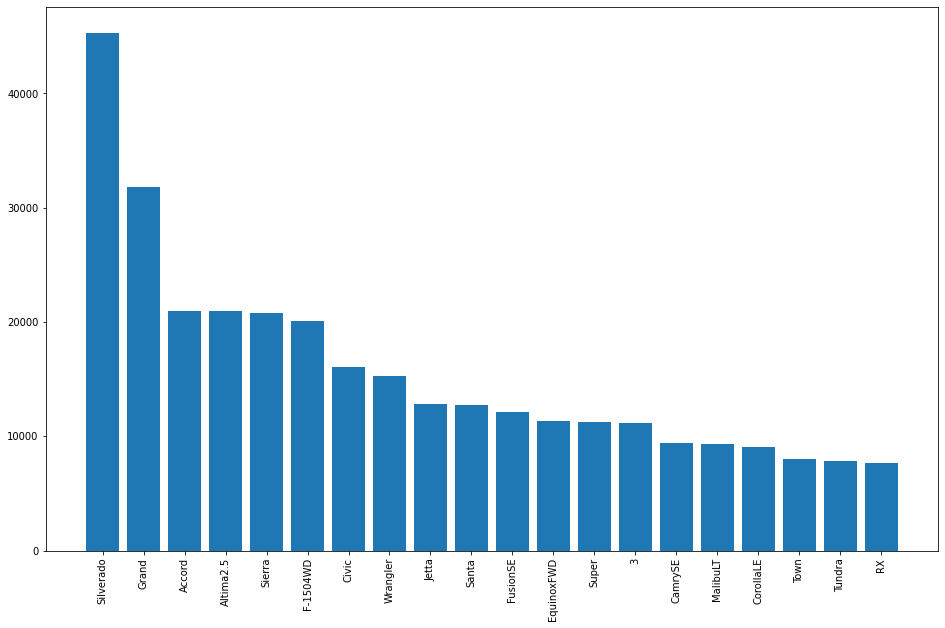

In [92]:
# frequency of model
plt.figure(figsize=(16,10))
plt.bar(list(mdata['Model'].value_counts()[0:20].keys()),list(mdata['Model'].value_counts()[0:20]))
plt.xticks(rotation=90)
plt.show()

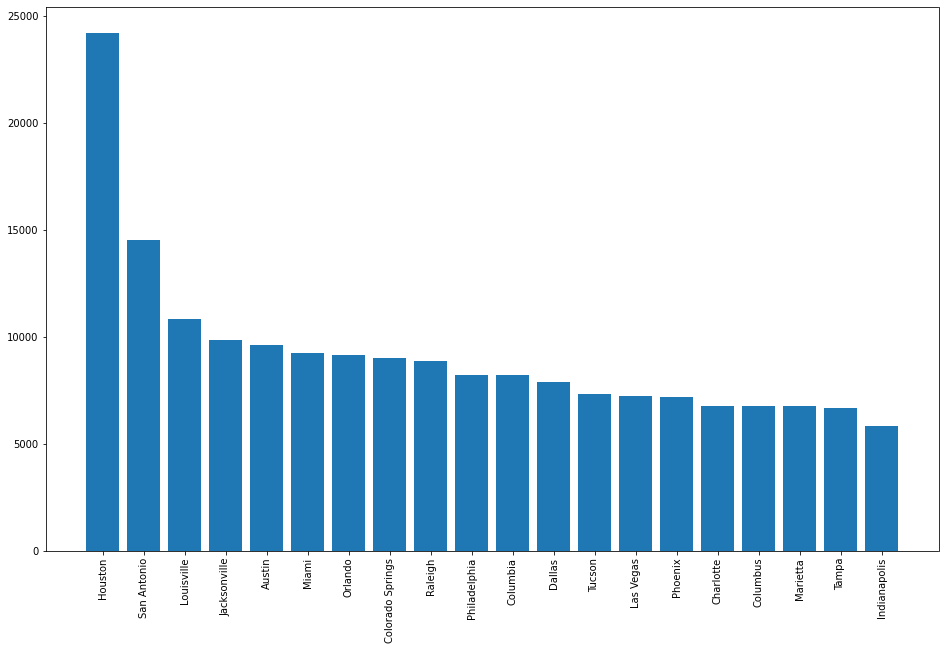

In [90]:
# frequency of city
plt.figure(figsize=(16,10))
plt.bar(list(mdata['City'].value_counts()[0:20].keys()),list(mdata['City'].value_counts()[0:20]))
plt.xticks(rotation=90)
plt.show()

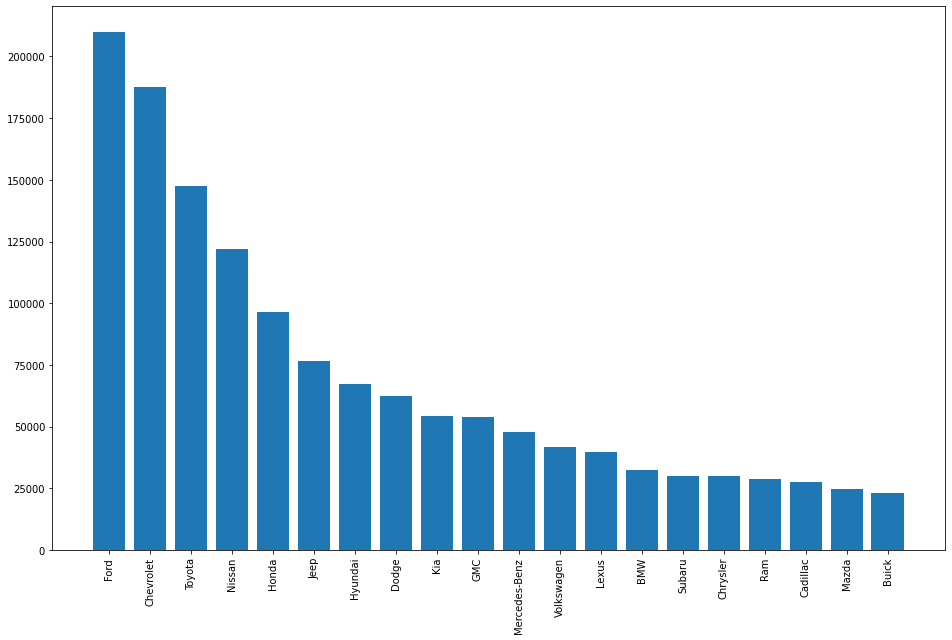

In [91]:
plt.figure(figsize=(16,10))
plt.bar(list(mdata['Make'].value_counts()[0:20].keys()),list(mdata['Make'].value_counts()[0:20]))
plt.xticks(rotation=90)
plt.show()

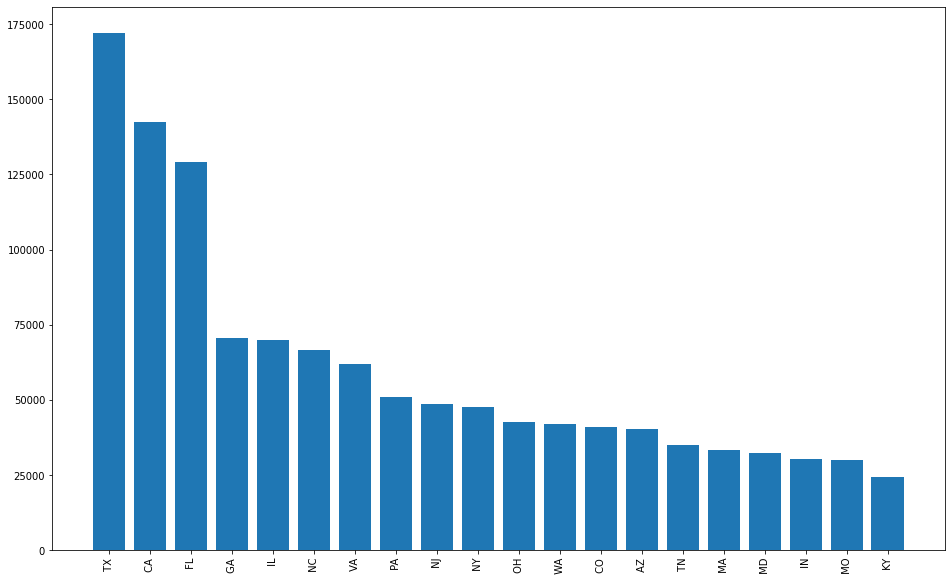

In [93]:
plt.figure(figsize=(16,10))
plt.bar(list(mdata['State'].value_counts()[0:20].keys()),list(mdata['State'].value_counts()[0:20]))
plt.xticks(rotation=90)
plt.show()

# vizualizing relationships of Numerical and Categorical data

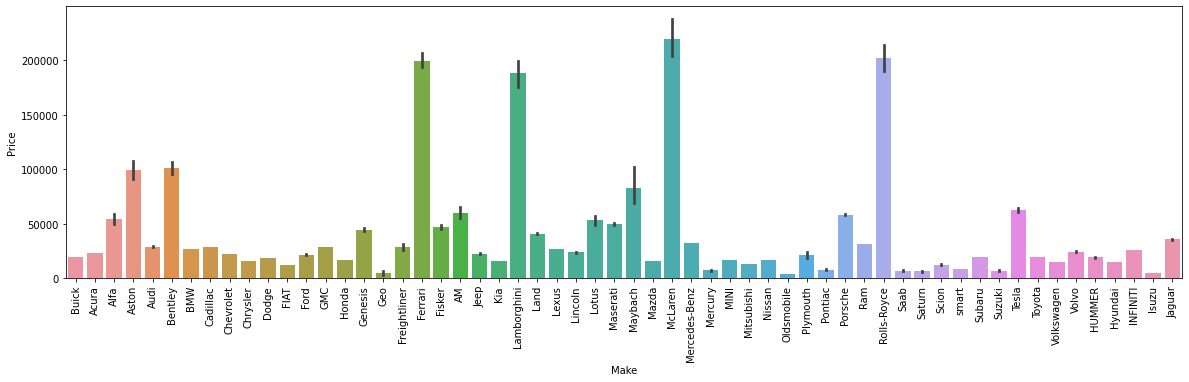

In [95]:
plt.figure(figsize=(20, 5))
plt.xticks(rotation=90)
sns.barplot(x='Make', y='Price', data=mdata);